In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-coronavirus-pandemic-dataset/Covid Live.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


In [2]:
covid = pd.read_csv('/kaggle/input/covid-19-coronavirus-pandemic-dataset/Covid Live.csv')
covid.head(20)

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
5,6,S. Korea,"24,769,101","28,406",42.0,"24,013,461","727,234",352,"482,547",553,"15,804,065","307,892","51,329,899"
6,7,UK,"23,621,952","189,919",NaN,"23,347,871","84,162",146,"344,857","2,773","522,526,476","7,628,357","68,497,907"
7,8,Italy,"22,432,803","177,054",NaN,"21,779,604","476,145",141,"372,250","2,938","246,636,495","4,092,684","60,262,770"
8,9,Japan,"21,229,216","44,678",NaN,"20,380,089","804,449",204,"169,043",356,"76,201,407","606,772","125,584,838"
9,10,Russia,"20,948,470","387,163",NaN,"19,979,763","581,544","2,300","143,674","2,655","273,400,000","1,875,095","145,805,947"


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  230 non-null    int64  
 1   Country,
Other     230 non-null    object 
 2   Total
Cases        230 non-null    object 
 3   Total
Deaths       225 non-null    object 
 4   New
Deaths         3 non-null      float64
 5   Total
Recovered    214 non-null    object 
 6   Active
Cases       215 non-null    object 
 7   Serious,
Critical  147 non-null    object 
 8   Tot Cases/
1M pop  228 non-null    object 
 9   Deaths/
1M pop     223 non-null    object 
 10  Total
Tests        214 non-null    object 
 11  Tests/
1M pop      214 non-null    object 
 12  Population         228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 23.5+ KB


In [4]:
deaths = covid[['Country,\nOther','Total\nDeaths','Population']]
deaths

,"Country,\nOther",Total\nDeaths,Population
0,USA,"1,084,282","334,805,269"
1,India,"528,629","1,406,631,776"
2,France,"155,078","65,584,518"
3,Brazil,"686,027","215,353,593"
4,Germany,"149,948","83,883,596"
...,...,...,...
225,Niue,NaN,"1,622"
226,Vatican City,NaN,799
227,Tuvalu,NaN,"12,066"
228,Western Sahara,1,"626,161"


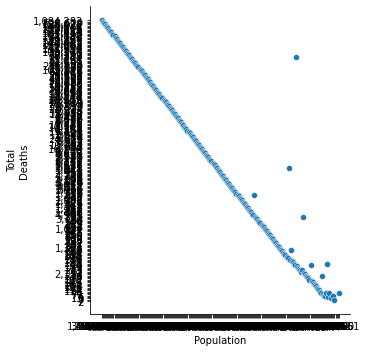

In [5]:
sns.relplot(x='Population', y='Total\nDeaths', data=deaths)

In [6]:
cases = covid[['Country,\nOther','Total\nCases','Population']]
cases

,"Country,\nOther",Total\nCases,Population
0,USA,"98,166,904","334,805,269"
1,India,"44,587,307","1,406,631,776"
2,France,"35,342,950","65,584,518"
3,Brazil,"34,706,757","215,353,593"
4,Germany,"33,312,373","83,883,596"
...,...,...,...
225,Niue,80,"1,622"
226,Vatican City,29,799
227,Tuvalu,20,"12,066"
228,Western Sahara,10,"626,161"


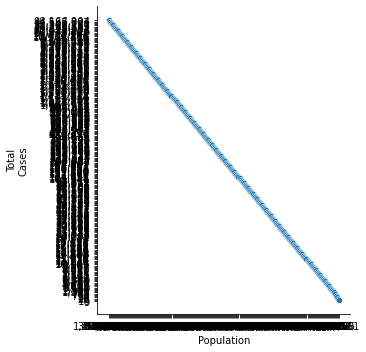

In [7]:
sns.relplot(x='Population', y='Total\nCases', data=cases)

In [8]:
vaccine = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
vaccine.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [9]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [10]:
sns.set()
vaccinated = vaccine[['country','people_vaccinated', 'people_fully_vaccinated']]
vaccinated

,country,people_vaccinated,people_fully_vaccinated
0,Afghanistan,0.0,NaN
1,Afghanistan,NaN,NaN
2,Afghanistan,NaN,NaN
3,Afghanistan,NaN,NaN
4,Afghanistan,NaN,NaN
...,...,...,...
86507,Zimbabwe,4814582.0,3473523.0
86508,Zimbabwe,4886242.0,3487962.0
86509,Zimbabwe,4918147.0,3493763.0
86510,Zimbabwe,4975433.0,3501493.0


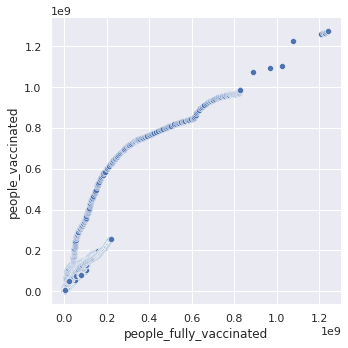

In [11]:
sns.relplot(x='people_fully_vaccinated', y='people_vaccinated', data=vaccinated)

Based on the graph's, the amount of people fully vaccinated increased in countries that have had more covid deaths in their population. 